#Análises exploratorio de datos sobre o dataset: football_transfers_2021.csv

In [7]:
# Cargamos as librarías
from google.colab import drive;

drive.mount('/content/drive')

import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
datos = pd.read_csv("/content/drive/MyDrive/EDA/players.csv")


#Propósito do análise

##O principal propósito do análise exploratorio é ter unha idea completa de cómo son os nosos datos. O ficheiro atópase na páxina de Kaggle en: https://www.kaggle.com/sanjeetsinghnaik/most-expensive-footballers-2021

Para ele imos analizar un dataset que contén os rexistros dos 500 xogadores máis valiosos do 2021, según a web de transfermarkt: https://www.transfermarkt.es

Como na práctica os datos non son ideais, debemos organizalos, entender o seu contido, entender cáles son as variables máis relevantes e cómo se relacionan unhas coas outras, comezar a ver alguns patróns, determinar qué facer cos datos faltantes e cos datos atípicos, e finalmente extraer conclusións acerca de todo este análisis.

Todo isto é precisamente o análise exploratorio de datos, que é en resumo unha forma de entender, visualizar e extraer información relevante do set de datos para poder decidir cál será a ruta ou técnica máis axeitada para o seu posterior procesamento.

Tendo esto claro, podemos resumir as fases do análise exploratorio en 7 pasos:

    1 Ter clara as preguntas que queremos responder;
    2 Ter unha idea xeral do noso dataset;
    3 Definilos tipos de datos que temos;
    4 Elexir o tipo de estatística descriptiva;
    5 Visualizar los datos;
    6 Analizalas posibles interaccións entre as variables do dataset
    8 Extraer algunhas conclusións de todo este análise.


##Neste caso imos empregar un dataset cos rexistros dos 250 xogadores máis vaiosos de fúbol no 2021
Para comezar imos facer unha primeira visual do dataset.

In [ ]:
datos.head()

,Unnamed: 0,Name,Position,Age,Markey Value In Millions(£),Country,Club,Matches,Goals,Own Goals,Assists,Yellow Cards,Second Yellow Cards,Red Cards,Number Of Substitute In,Number Of Substitute Out
0,0,Kylian Mbappé,Centre-Forward,22,144.0,France,Paris Saint-Germain,16,7,0,11,3,0,0,0,8
1,1,Erling Haaland,Centre-Forward,21,135.0,Norway,Borussia Dortmund,10,13,0,4,1,0,0,0,1
2,2,Harry Kane,Centre-Forward,28,108.0,England,Tottenham Hotspur,16,7,0,2,2,0,0,2,2
3,3,Jack Grealish,Left Winger,26,90.0,England,Manchester City,15,2,0,3,1,0,0,2,8
4,4,Mohamed Salah,Right Winger,29,90.0,Egypt,Liverpool FC,15,15,0,6,1,0,0,0,3


Imos ver máis información dos datos, nomes das columnas, tipo de datos que conteñen, número de referencias.
Vemos que o dataset consta de 16 columnas, das cales 11 son do tipo int64, 4 object e 1 float64
Tamén podemos ver o número de rexitros do que consta o dataset, neste caso 500 

In [ ]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   500 non-null    int64  
 1   Name                         500 non-null    object 
 2   Position                     500 non-null    object 
 3   Age                          500 non-null    int64  
 4   Markey Value In Millions(£)  500 non-null    float64
 5   Country                      500 non-null    object 
 6   Club                         500 non-null    object 
 7   Matches                      500 non-null    int64  
 8   Goals                        500 non-null    int64  
 9   Own Goals                    500 non-null    int64  
 10  Assists                      500 non-null    int64  
 11  Yellow Cards                 500 non-null    int64  
 12  Second Yellow Cards          500 non-null    int64  
 13  Red Cards           

In [ ]:
datos.shape


(500, 16)

In [ ]:
columnas = list(datos.columns)
columnas

['Unnamed: 0',
 'Name',
 'Position',
 'Age',
 'Markey Value In Millions(£)',
 'Country',
 'Club',
 'Matches',
 'Goals',
 'Own Goals',
 'Assists',
 'Yellow Cards',
 'Second Yellow Cards',
 'Red Cards',
 'Number Of Substitute In',
 'Number Of Substitute Out']

#Copia de datos

##Facemos unha copia de datos para manter unha copia cos datos orixináis e cambio os nomes das columnas da copia para traballar con máis facilidade

In [ ]:

futbolistas = datos.copy(deep=True)
futbolistas.to_csv('futbolistas_limpo.csv',index=False)
futbolistas.columns = ['Id',
                       'Nome',
                       'Posicion',
                       'Idade',
                       'Valor',
                       'Pais',
                       'Clube',
                       'Partidos',
                       'Goles',
                       'En_Propia',
                       'Asistencias',
                       'Amarelas',
                       'Segunda_Amarela',
                       'Vermella',
                       'Entrada_dendebanco',
                       'Cambiado']

#Limpeza de datos

Imos comprobar si o dataset ten rexistros nulos

In [ ]:
futbolistas.isnull().sum()

Id                    0
Nome                  0
Posicion              0
Idade                 0
Valor                 0
Pais                  0
Clube                 0
Partidos              0
Goles                 0
En_Propia             0
Asistencias           0
Amarelas              0
Segunda_Amarela       0
Vermella              0
Entrada_dendebanco    0
Cambiado              0
dtype: int64

Vemos que non temos nulos, co cal, evitamos ter que tratalos. No caso de ter valores nulos teríamos que buscar a mellor solución para procesalos, borrado, completar coa media, co valor anterior, posterior ou buscando outro tipo de relacción que nos permitise eliminar eses datos nulos sen modificar a calidade dos datos

O primeiro paso, a pregunta que queremos responder neste caso é,  ¿que tipo de xogador é máis valioso?

E para responder a esta pregunta debemos botar un primero vistazo o dataset, miralo seu tamaño, determinar cáles son as características ou variables (é decir as columnas da taboa) e dar un primero barrido os rexistros ou observacións (é decir as filas do dataset):

##Comprobamos se existen filas duplicadas, no caso de existir eliminariamolas

In [ ]:
print(f'Total de filas duplicadas: {futbolistas.duplicated().sum()}')

Total de filas duplicadas: 0


Unha vez finalizamos a limpeza podemos gardar os datos se existen moitas modificacións ou facer unha copia e traballar con ela

#Qué tipo de datos temos?

##Vendo o dataset podemos ver que temos principalmente dous tipos de datos, numéricos e categóricos

#Descripción estadística dos datos

##Consultamos o número de valores diferentes en cada columna

In [ ]:
futbolistas.nunique(axis=0)

Id                    500
Nome                  500
Posicion               13
Idade                  20
Valor                  34
Pais                   57
Clube                  81
Partidos               24
Goles                  17
En_Propia               2
Asistencias            12
Amarelas                8
Segunda_Amarela         2
Vermella                2
Entrada_dendebanco     14
Cambiado               18
dtype: int64

##limpeza de columnas tipo string, eliminando espazos extra. Reviso que os datos non teñan espazos en blanco:

In [ ]:
for col in ['Nome', 'Posicion','Pais','Clube']:
    futbolistas[col] = futbolistas[col].apply(lambda x: ' '.join(x.split()))

#Análise e distribucción das variables categóricas

##Analizamos os datos das variables Pais, clube e posición e vemos se existe algunha relación con respecto ó valor do xogador

##Empezamos analizando a Pais

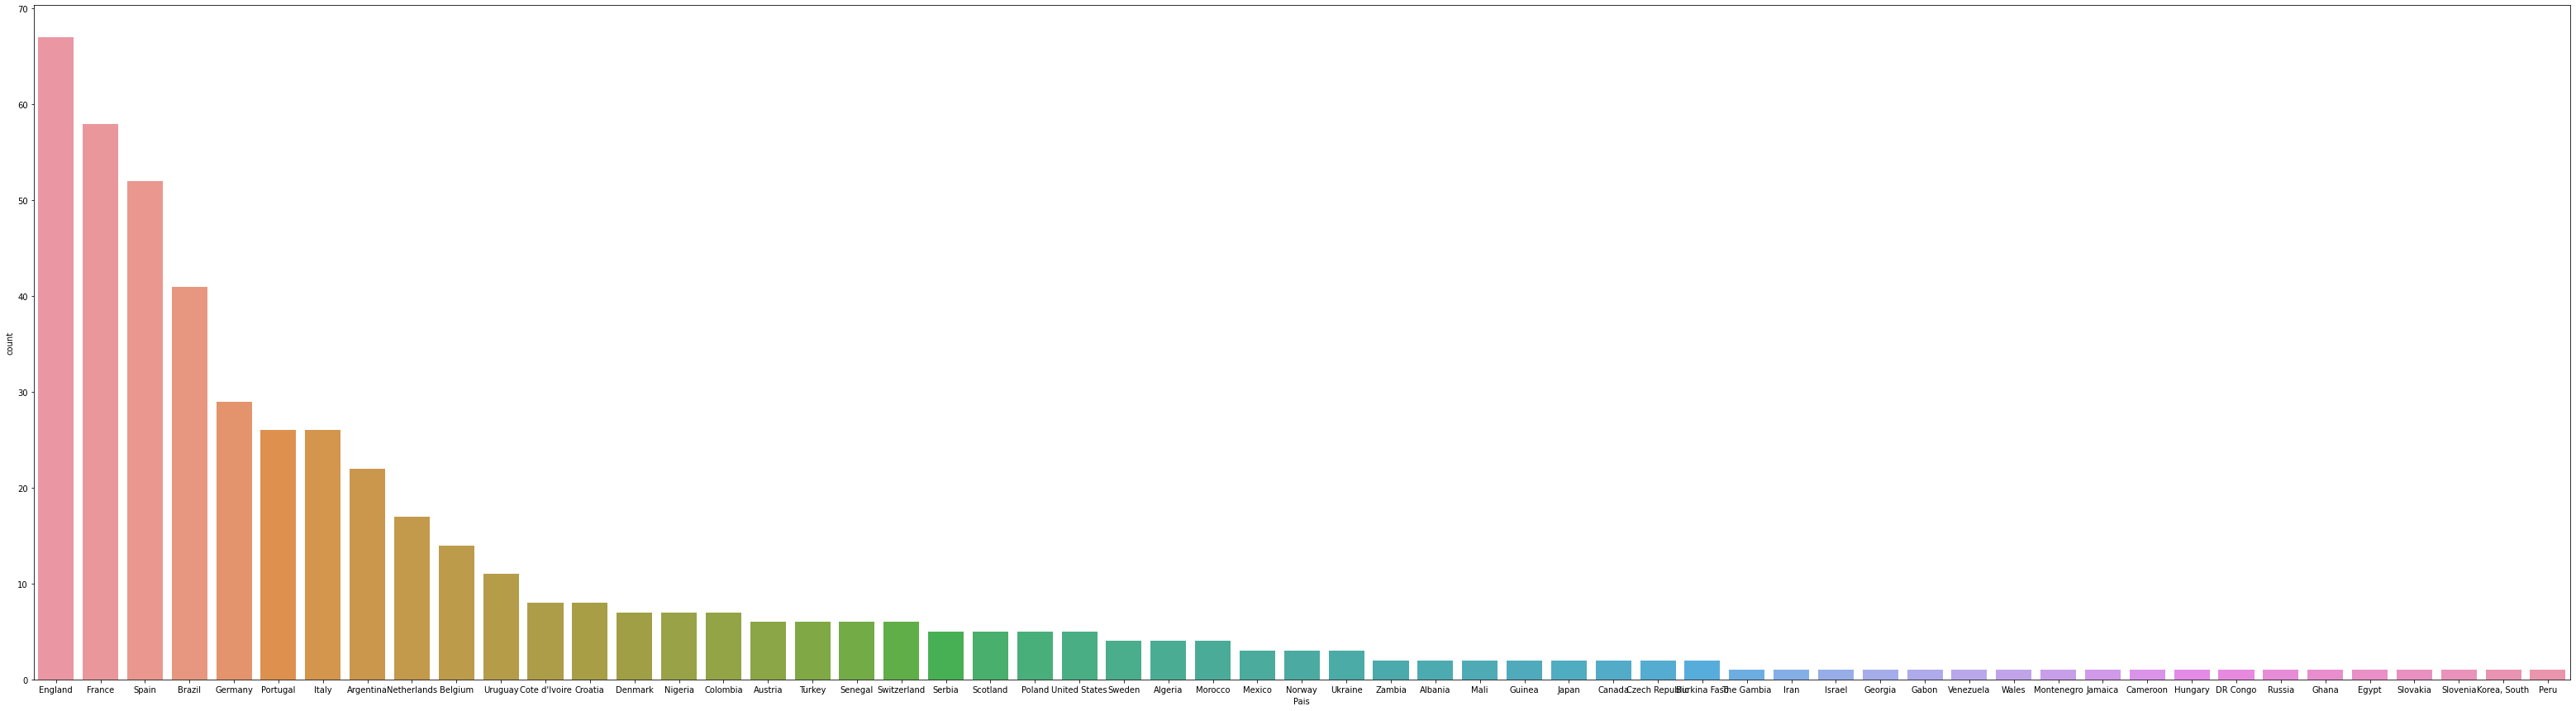

In [ ]:

plt.figure(figsize=(55,15))
sns.countplot(data=futbolistas,x='Pais',order=futbolistas['Pais'].value_counts().index)
fig = plt.figure(1, (18, 4))

plt.show()

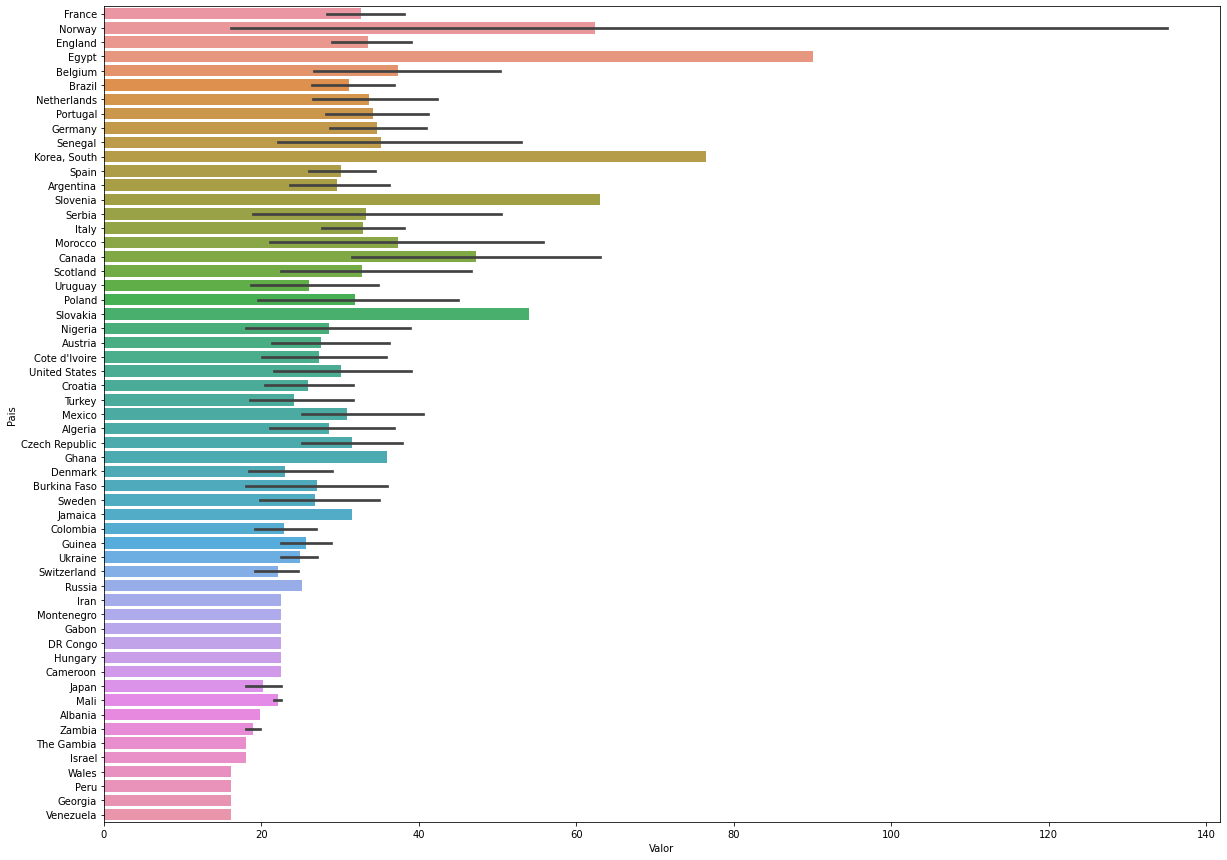

In [ ]:

futbolistas.sort_values(by='Valor',ascending=False,inplace=True)
plt.figure(figsize=(20,15))
sns.barplot(data=futbolistas, y='Pais',x='Valor')



Na primeira gráfica mostramos o número de xogadores que hai por cada país e na segunda mostramos o mesmo pero engadindo a media do valor

##Vemos como interfire a posición no valor do xogador

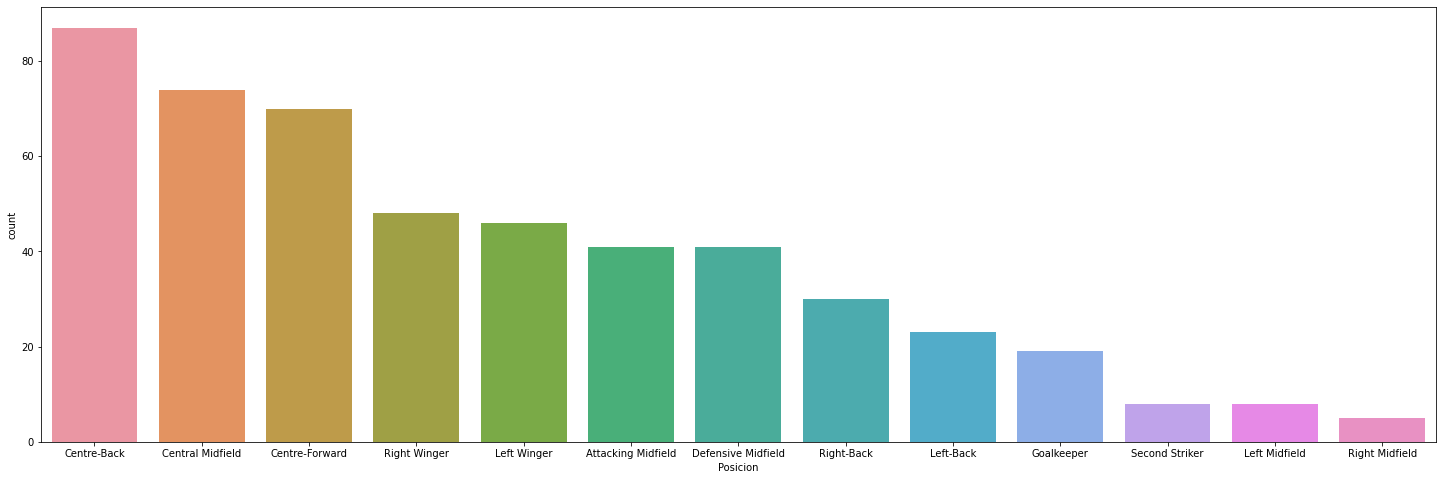

In [ ]:
plt.figure(figsize=(25,8))
sns.countplot(data=futbolistas,x='Posicion',order=futbolistas['Posicion'].value_counts().index)
fig = plt.figure(1, (18, 4))

plt.show()

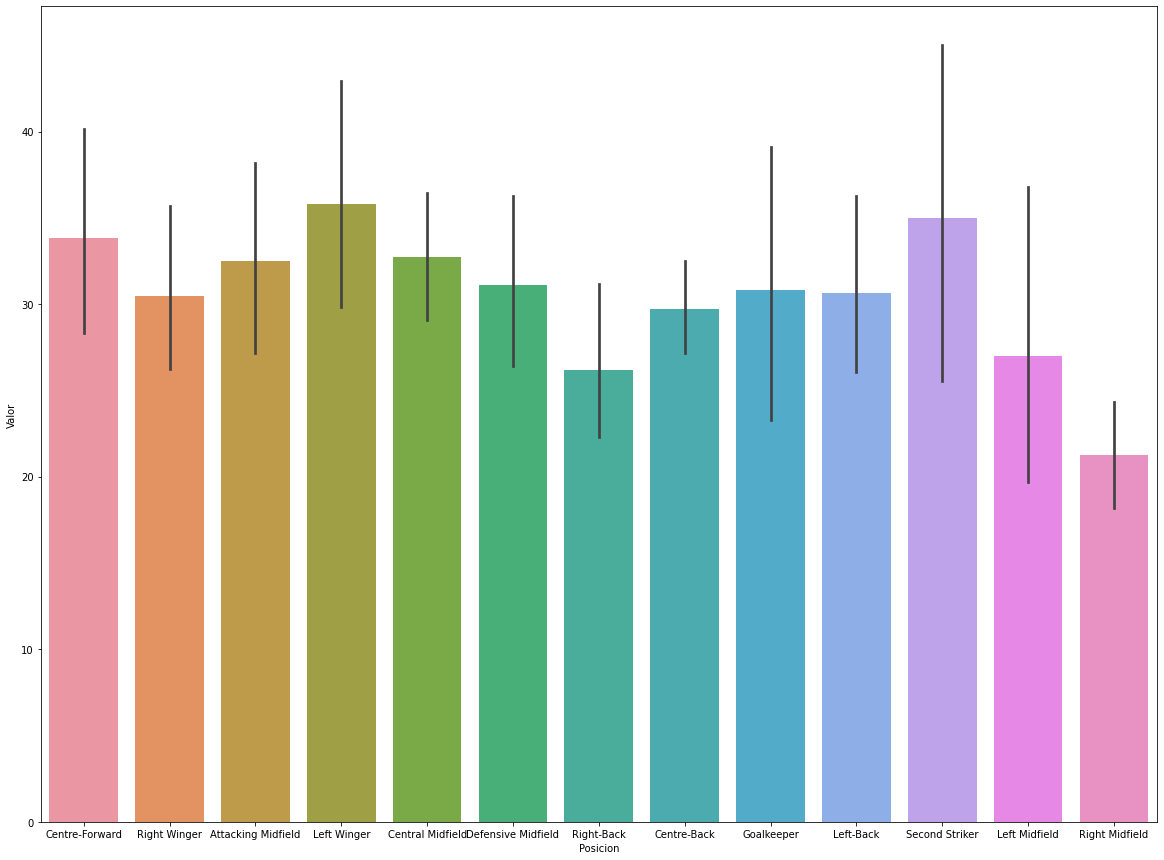

In [ ]:

plt.figure(figsize=(20,15))
sns.barplot(data = futbolistas, x = 'Posicion', y= 'Valor')

Nestas dúas gráficas analizamos si influe dalgunha maneira a posición que ocupa o xogador co seu valor, vemos que ten as medias de valor máis alta "Second Striker" está de terceiro pola cola en cantidades, o segundo "Left Winger", tampouco é dos que máis cantidades ten, polo que podemos decir que a posición e a cantidade de xogadores nesa posición influe no valor

##Miro se existe correlación entre clubes e valor

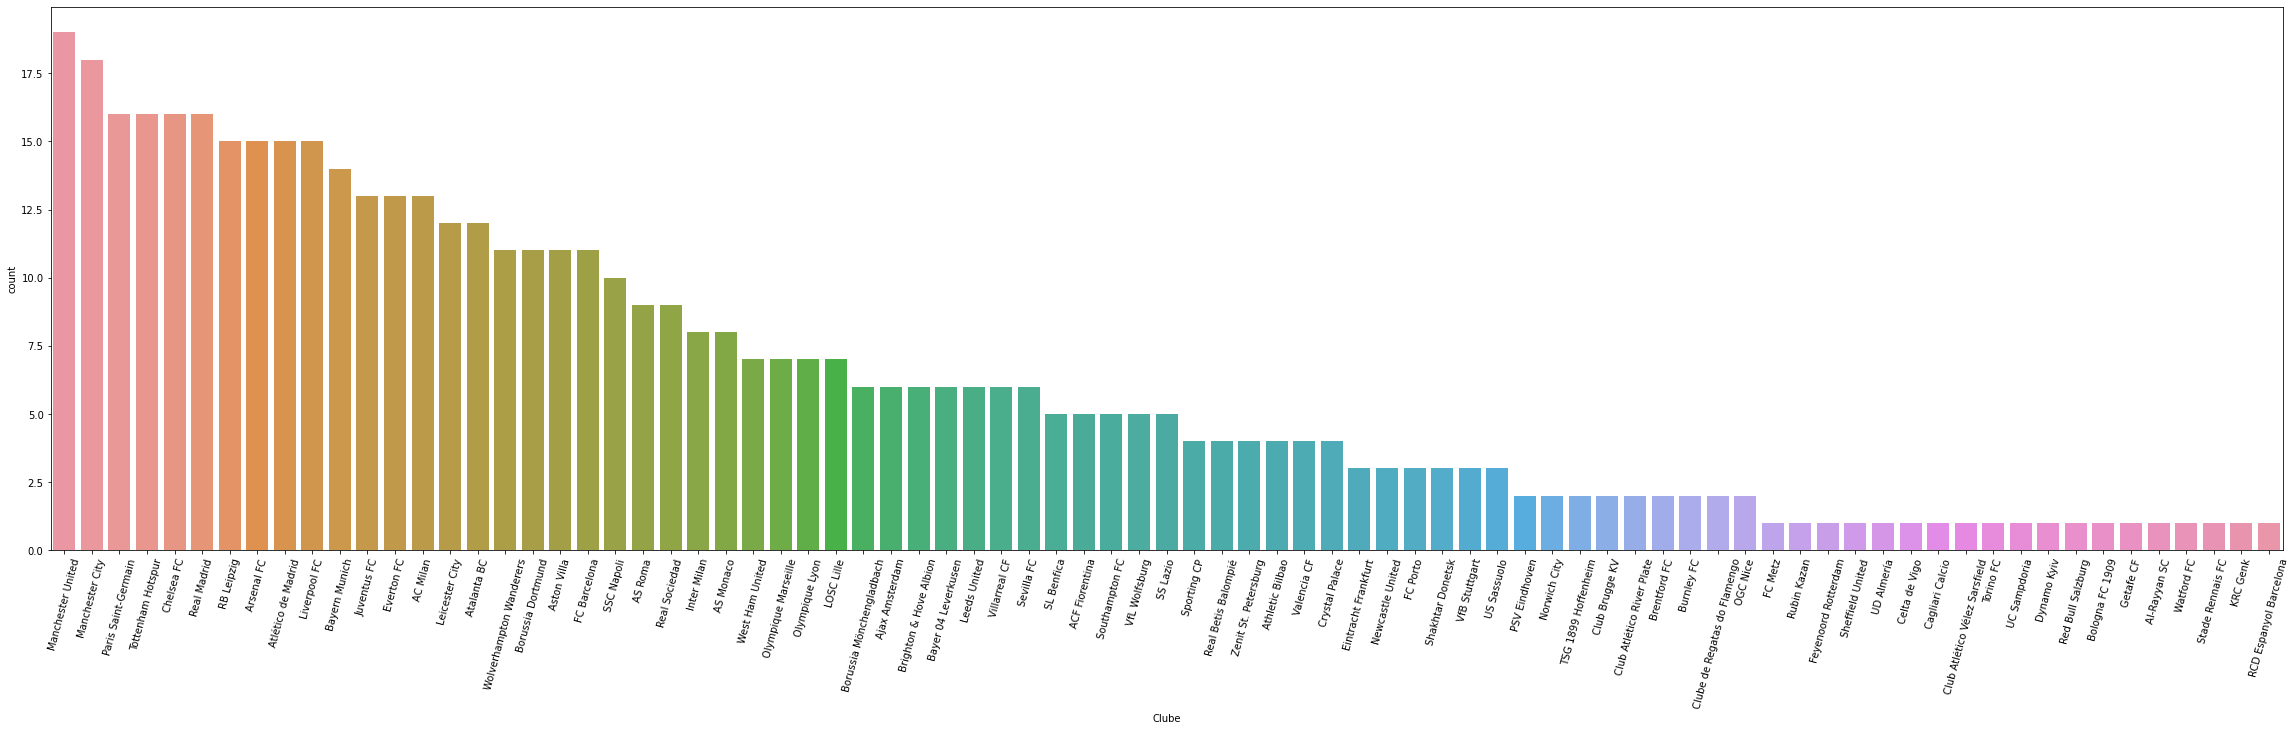

In [ ]:
fig = plt.figure(1, (40, 10))

ax1 = plt.subplot(1,1,1)
sns.countplot(data=futbolistas,x='Clube', order=futbolistas['Clube'].value_counts().index)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=75)

plt.show()



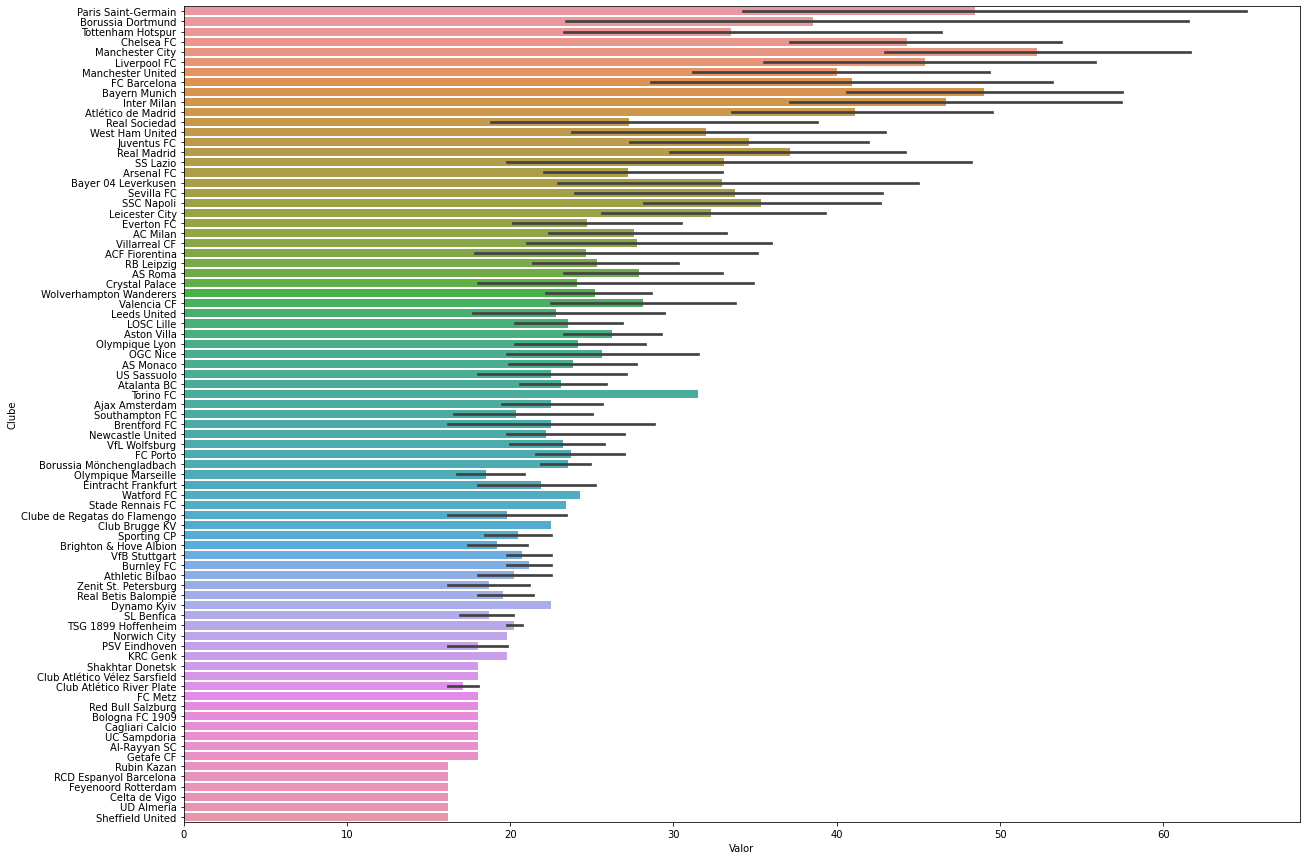

In [ ]:
futbolistas.sort_values(by='Valor',ascending=False,inplace=True)
plt.figure(figsize=(20,15))
sns.barplot(data=futbolistas, y='Clube',x='Valor')

Aquí comparamos o valor do xogador e o clube donde xoga, coma nas dúas gráficas anteriores na que existía unah relación entre posición e valor, aquí podemos chegar a unha conclusión similar xa que a competición e da liga na que participe o clube gardan relación co valor, así os equipos que participan na Champions Leage ou xogan na Premier Leage teñen unha cantidade maior de xogadores valiosos

##Como resumo, vendo as gráficas podemos decir que os xogadores máis valiosos son segundos dianteiros ou estremos esquerdos, e que xogan en equipos que participan na Champions ou se non participan na Champions xogan na liga inglesa

#Análise e distribucción das variables numéricas

In [ ]:
futbolistas.describe()

,Id,Idade,Valor,Partidos,Goles,En_Propia,Asistencias,Amarelas,Segunda_Amarela,Vermella,Entrada_dendebanco,Cambiado
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,249.500000,24.968000,31.537800,12.396000,2.160000,0.030000,1.51200,1.592000,0.036000,0.046000,2.394000,3.744000
std,144.481833,3.165916,17.577697,4.342453,2.880102,0.170758,1.85276,1.445585,0.186477,0.209695,2.517825,3.293046
min,0.000000,16.000000,16.200000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,124.750000,23.000000,19.800000,10.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,249.500000,25.000000,25.200000,13.000000,1.000000,0.000000,1.00000,1.000000,0.000000,0.000000,2.000000,3.000000
75%,374.250000,27.000000,36.000000,16.000000,3.000000,0.000000,2.00000,2.000000,0.000000,0.000000,3.250000,6.000000
max,499.000000,36.000000,144.000000,24.000000,23.000000,1.000000,12.00000,7.000000,1.000000,1.000000,13.000000,20.000000


##Comprobamos a matriz de correlacións para ver céles poden ser as variables que teñan unha mellor relación

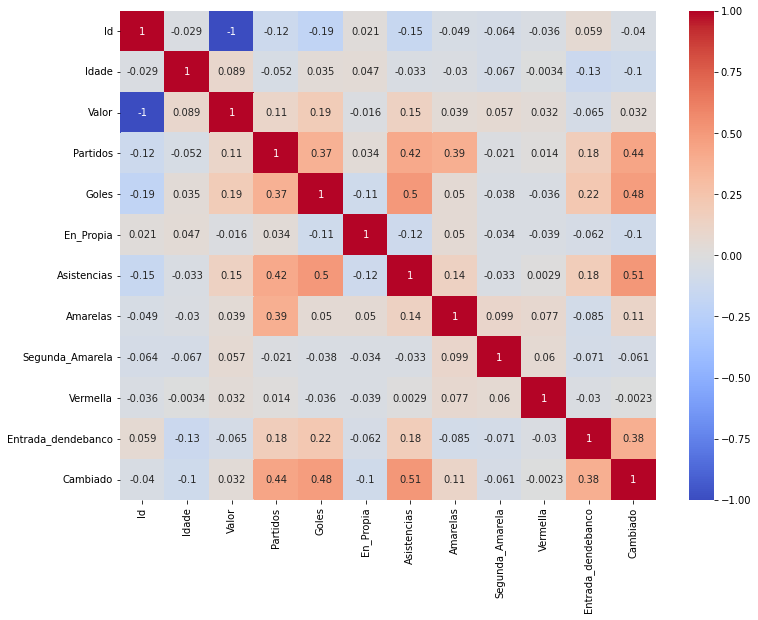

In [ ]:

f, ax = plt.subplots(figsize=(12,9))


sns.heatmap(futbolistas.corr(method='spearman'), annot = True, vmin = -1, vmax = 1, center = 0, cmap = 'coolwarm')
plt.show()

##Mostramos as 10 mellores correlacións con respecto a variable de "Valor"

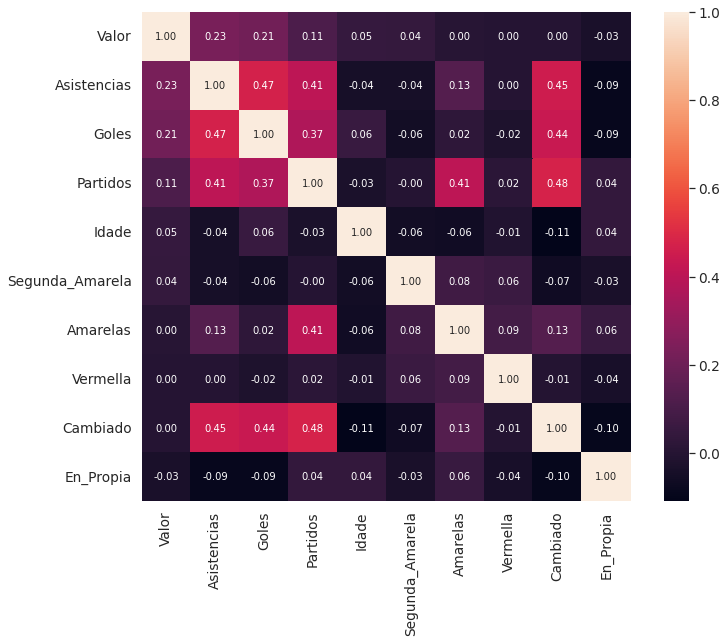

In [ ]:
k = 10
cols=corrmat.nlargest(k,'Valor')['Valor'].index;
cm = np.corrcoef(futbolistas[cols].values.T);
sns.set(font_scale=1.25);
plt.subplots(figsize= (12, 9));
hm = sns.heatmap(cm, cbar=True, annot=True,
                 square=True, fmt='.2f',
                 annot_kws={'size': 10},
                 yticklabels=cols.values,
                 xticklabels=cols.values);
plt.show();

Podemos ver que as que teñen unha maior influencia no valor son partidos, goles e asistencias.
Tamén resulta curioso que existe unha correlación entre goles e asistencias coa variable cambiado o que parece indicar que cando un marca goles e da asistencias acaba sendo trocado

##Agora vou estudiar máis detalladamente aquelas que parece que poden ter máis influencia no valor, engado tamén idade que parece que non garda relación co valor do xogador pero paréceme interesante botarlle un vistazo

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f48c72d2d50>,
      dtype=object)

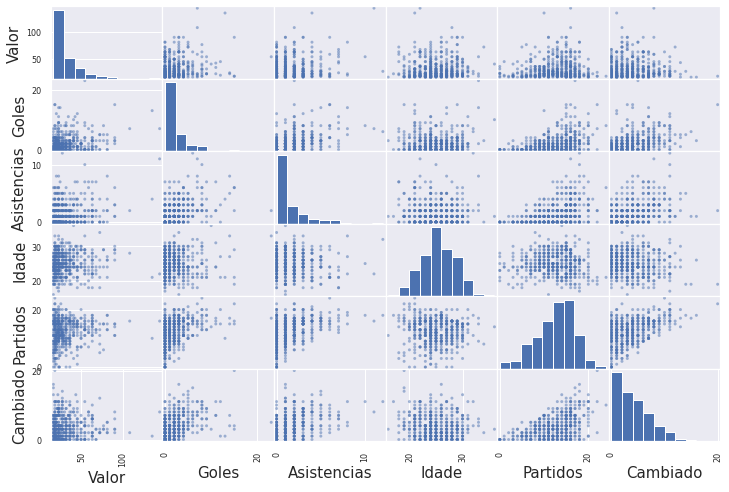

In [ ]:
from pandas.plotting import scatter_matrix

attributes = ["Valor", 
              "Goles", 
              "Asistencias",
              "Idade",
              "Partidos",
              "Cambiado"
              ]
              
scatter_matrix(futbolistas[attributes], figsize=(12, 8))

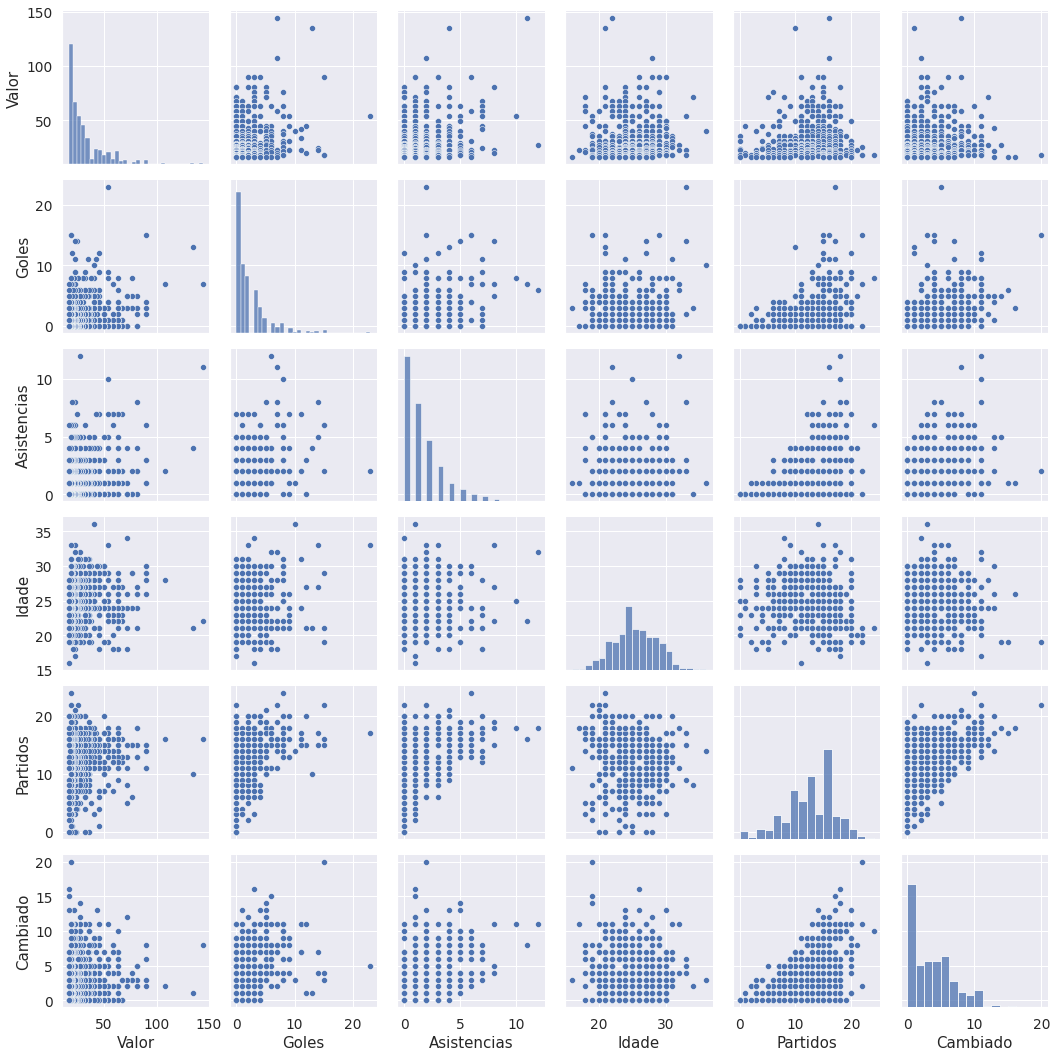

In [ ]:
cols = ["Valor", 
        "Goles", 
        "Asistencias",
        "Idade",
        "Partidos",
        "Cambiado"]
sns.pairplot(futbolistas[cols]);
plt.show();

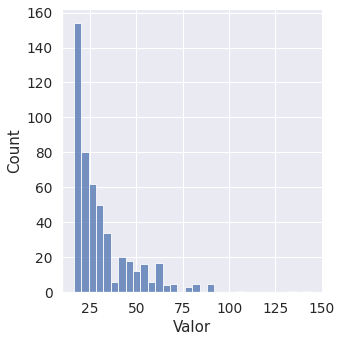

In [ ]:
sns.displot(futbolistas['Valor'])
plt.show()

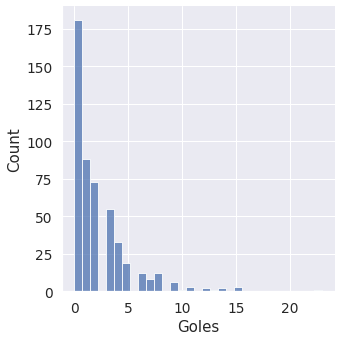

In [ ]:
sns.displot(futbolistas['Goles'])
plt.show()

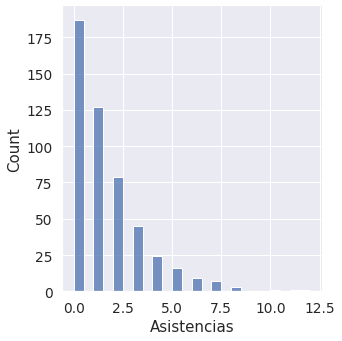

In [ ]:
sns.displot(futbolistas['Asistencias'])
plt.show()


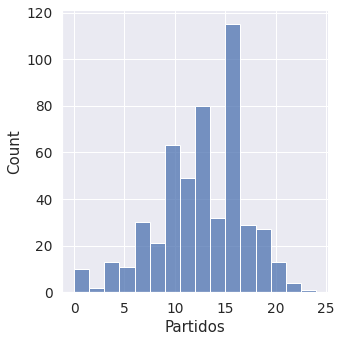

In [ ]:
sns.displot(futbolistas['Partidos'])
plt.show()

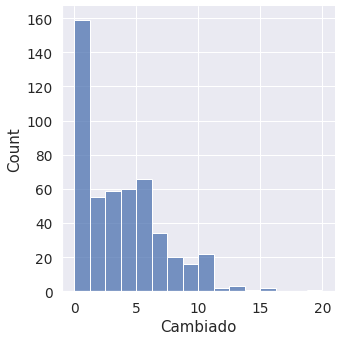

In [ ]:
sns.displot(futbolistas['Cambiado'])
plt.show()

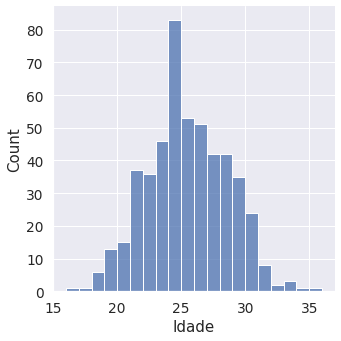

In [ ]:
sns.displot(futbolistas['Idade'])
plt.show()

##Analizamos a correlación das varibles con Valor

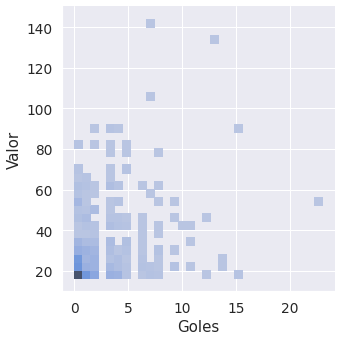

In [ ]:
sns.displot(data=futbolistas, x='Goles',y='Valor')

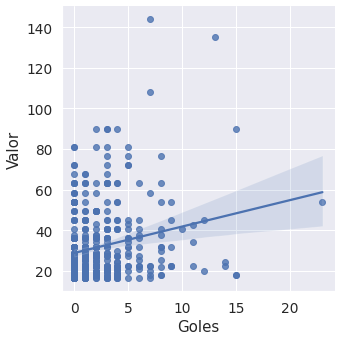

In [ ]:
sns.lmplot(x="Goles", y="Valor", data=futbolistas)

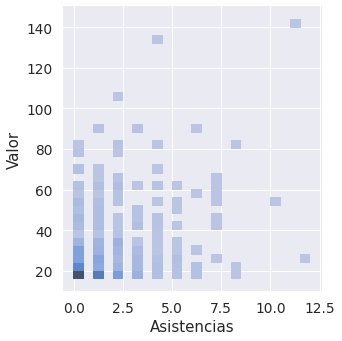

In [ ]:
sns.displot(data=futbolistas, x='Asistencias',y='Valor')

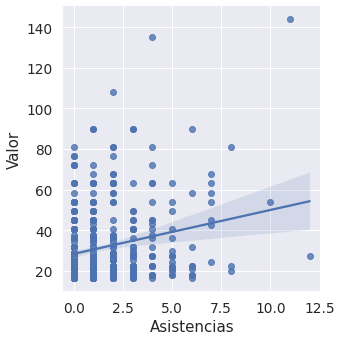

In [ ]:
sns.lmplot( x='Asistencias',y='Valor', data=futbolistas)

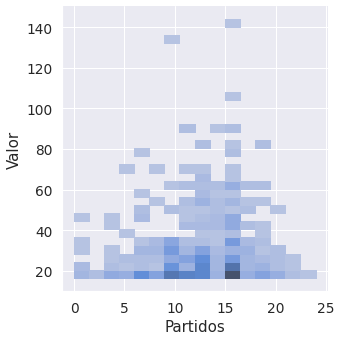

In [ ]:
sns.displot(data=futbolistas, x='Partidos',y='Valor')

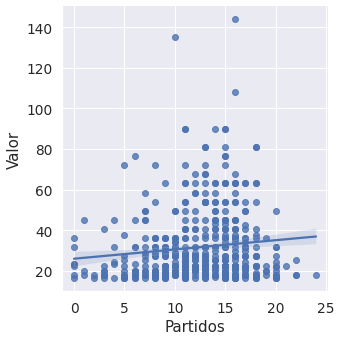

In [ ]:
sns.lmplot( x='Partidos',y='Valor', data=futbolistas)

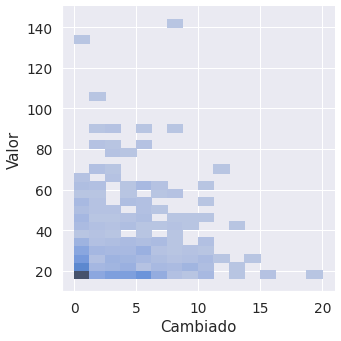

In [ ]:
sns.displot(data=futbolistas, x='Cambiado',y='Valor')

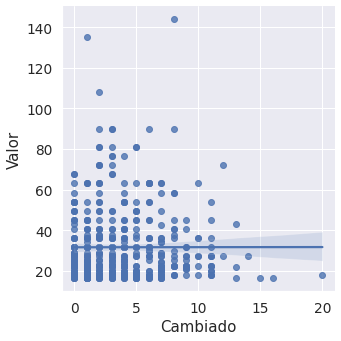

In [ ]:
sns.lmplot( x='Cambiado',y='Valor', data=futbolistas)

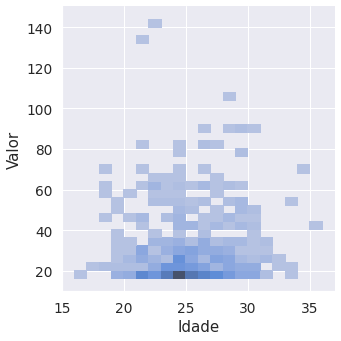

In [ ]:
sns.displot(data=futbolistas, x='Idade',y='Valor')

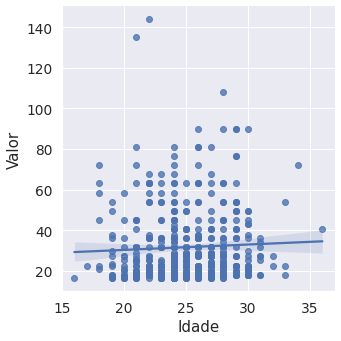

In [ ]:
sns.lmplot( x='Idade',y='Valor', data=futbolistas)

Podemos observar que o valor aumenta, cando aumentan o número de goles, asistencias e número de partidos xogados

#Analizamos posibles outliers

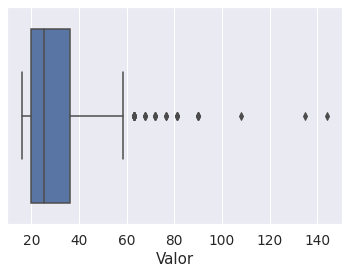

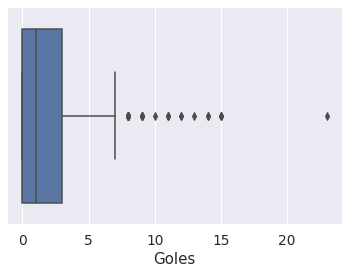

In [ ]:
sns.boxplot(data=futbolistas,x='Goles')

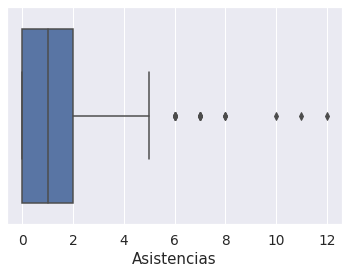

In [ ]:
sns.boxplot(data=futbolistas,x='Asistencias')

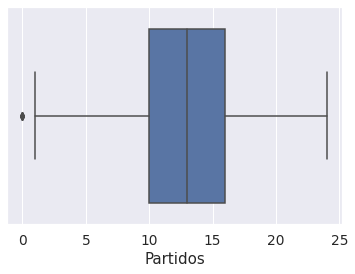

In [ ]:
sns.boxplot(data=futbolistas,x='Partidos')

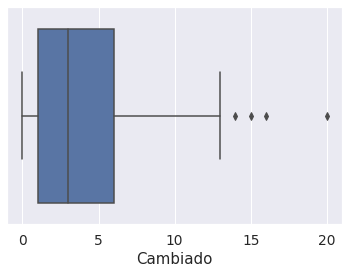

In [ ]:
sns.boxplot(data=futbolistas,x='Cambiado')

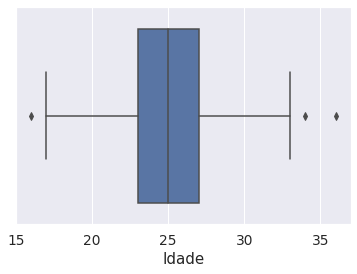

In [ ]:
sns.boxplot(data=futbolistas,x='Idade')

##Eliminamos os outliers

In [ ]:

rows = futbolistas[futbolistas.Valor > 60].index
futbolistas = futbolistas.drop(rows);

rows = futbolistas[futbolistas.Goles > 7].index
futbolistas = futbolistas.drop(rows);

rows = futbolistas[futbolistas.Asistencias > 6].index
futbolistas = futbolistas.drop(rows);

rows = futbolistas[futbolistas.Partidos < 1].index
futbolistas = futbolistas.drop(rows);

rows = futbolistas[futbolistas.Cambiado > 14].index
futbolistas = futbolistas.drop(rows);

rows = futbolistas[futbolistas.Idade > 34].index
futbolistas = futbolistas.drop(rows);

##Repetimos para ver si hai algunha modificación despóis de eliminar os outliers

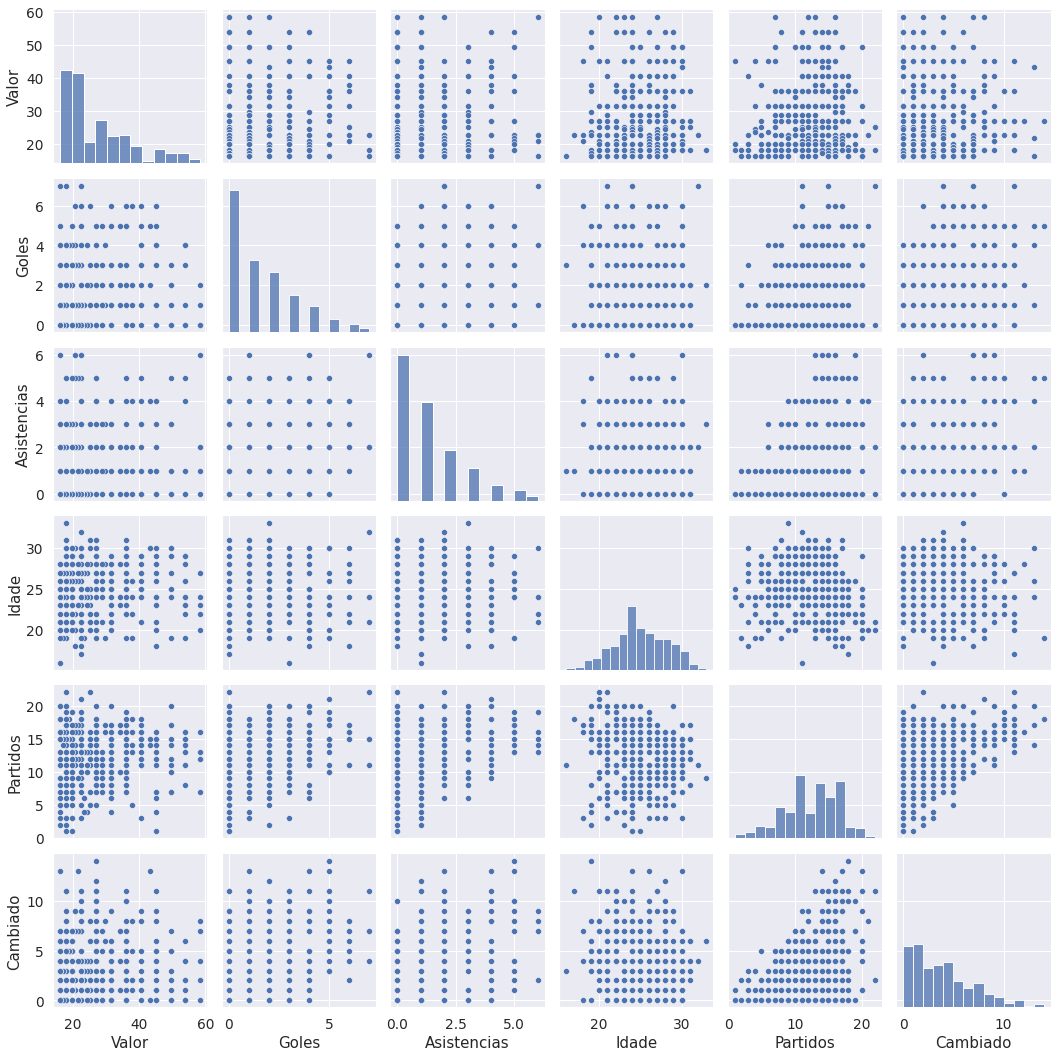

In [ ]:
cols = ["Valor", 
        "Goles", 
        "Asistencias",
        "Idade",
        "Partidos",
        "Cambiado"]
sns.pairplot(futbolistas[cols]);
plt.show();

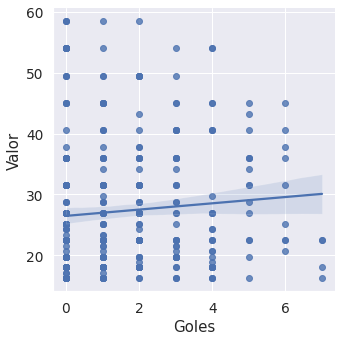

In [ ]:
sns.lmplot(x="Goles", y="Valor", data=futbolistas)

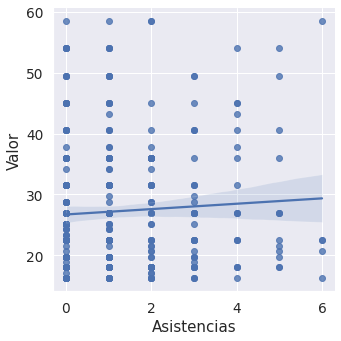

In [ ]:
sns.lmplot( x='Asistencias',y='Valor', data=futbolistas)

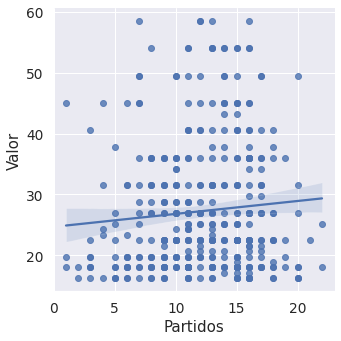

In [ ]:
sns.lmplot( x='Partidos',y='Valor', data=futbolistas)

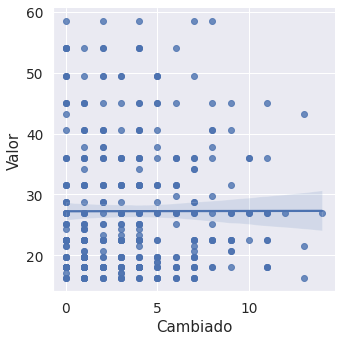

In [ ]:
sns.lmplot( x='Cambiado',y='Valor', data=futbolistas)

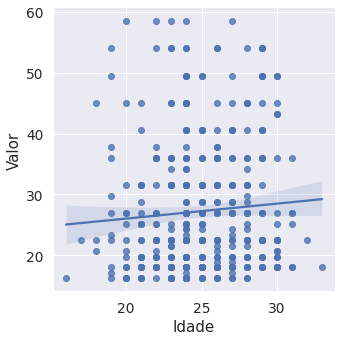

In [ ]:
sns.lmplot( x='Idade',y='Valor', data=futbolistas)

Unha vez eliminados os outliers podemos ver que as mismas relacións con respecto ó valor. A única modificación reseñable podémola ver na idade, o eliminar os outliers podemos decir que a maior idade máis valor

#Conclusión

##Unha vez analizados os datos podemos concluir que o valor dos xogadores depende do seguinte: En primeiro lugar das competición e clubes nos que xogan, xa que os xogadores máis valiosos son os que xogan a competición da Champions Leage ou xogan en equipos ingleses. O seguinte a ter en conta é a posición, xa que os xogadores máis valiosos son os segundos dianteiros e os estremos esquerdos, isto pode ser porque atendendo os datos numéricos os máis valiosos son os xogadores que máis goles marcan e máis asistencias dan e os dianteiros,segundos puntas e os estremos son os que mellores cifras acadan neses rangos, como hai menos extremos esquerdos e segundos puntas estes son máis valiosos. Por outro lado se eliminamos os outlaiers da variable idade podemos concluir que os xogadores van aumentando o valor con respecto a idade.